In [1]:
# Train Baseline Classifier Models

In [2]:
# %qtconsole

In [3]:
# imports
import pickle as pkl
import warnings
from joblib import load
from sklearn.model_selection import train_test_split
#
from moduleModelTraining import TrainingMethods
from moduleMetrics import MetricsMethods
from moduleUtilities import UtilityMethods
warnings.filterwarnings(action='ignore')

In [4]:
# class instances
train = TrainingMethods()
evaluate = MetricsMethods()
ut = UtilityMethods()

In [5]:
# Load dataframes from EDA_PreProcessing
with open('dataframes/df_std.joblib', 'rb') as f: df = load(f)

In [6]:
# select x,y parts of dataframe
features_to_process = 'auto'
x = df[ut.fs[features_to_process]]
y = df.iloc[:, df.columns.get_loc('target_class')]

# Save whole x, whole y
pkl.dump(x, open('fragments/x_'+features_to_process+'.joblib', 'wb'))
pkl.dump(y, open('fragments/y_'+features_to_process+'.joblib', 'wb'))

# Split x, y to train, test fragments
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=ut.sd['random_state'], 
                                                    test_size=ut.sd['test_size'], stratify=y)

# Save train/test fragments
# pkl.dump(x_train, open('fragments/x_train'+features_to_process+'.joblib', 'wb'))
# pkl.dump(y_train, open('fragments/y_train'+features_to_process+'.joblib', 'wb'))

print('x:',x.shape,' y:',y.shape)
print('x_train:',x_train.shape,' y_train:',y_train.shape)
print('x_test:',x_test.shape,' y_test:',y_train.shape)
print("Count of target class label NC: {}".format(sum(y_train==2)))
print("Count of target class label AD-MCI: {} \n".format(sum(y_train==1)))

x: (119, 12)  y: (119,)
x_train: (89, 12)  y_train: (89,)
x_test: (30, 12)  y_test: (89,)
Count of target class label NC: 19
Count of target class label AD-MCI: 70 



In [7]:
# train models before oversampling
trained_models = train.train_models(x_train, y_train, x_test, y_test)

Trained model:  lr  accuracy:  93.33
Trained model:  dt  accuracy:  96.67
Trained model:  rf  accuracy:  96.67
Trained model:  sv  accuracy:  93.33
Trained model:  gn  accuracy:  100.0
Trained model:  mp  accuracy:  90.0
Trained model:  kn  accuracy:  96.67
Trained model:  ce  accuracy:  96.67
Total training time: 1.7 seconds


Count of label NC (id 2 in Database, 1 in CM) in y_test: 6
Count of label AD-MCI (id 1 in Database, 0 in CM) in y_test: 24 



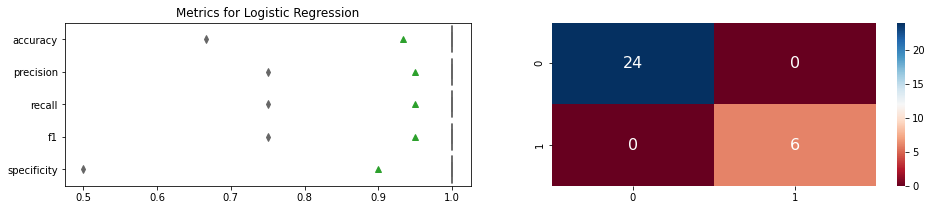

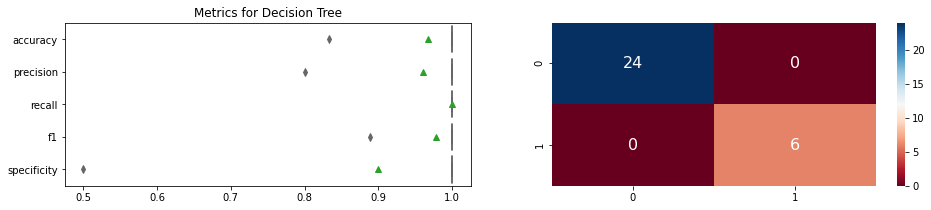

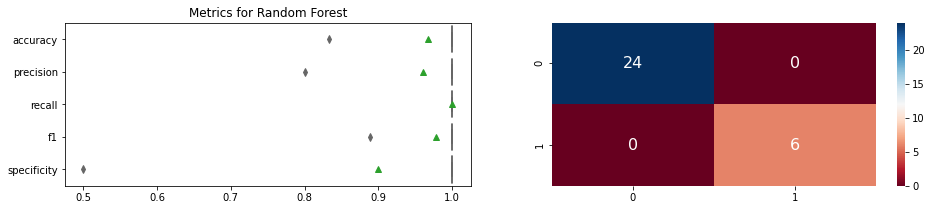

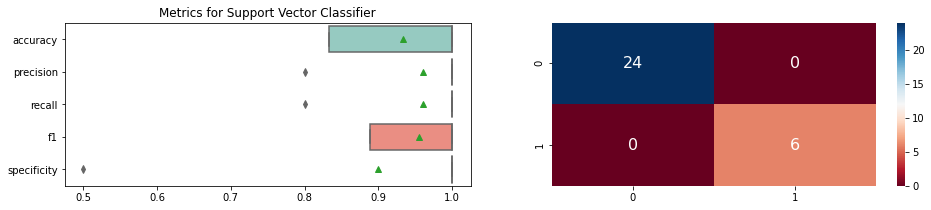

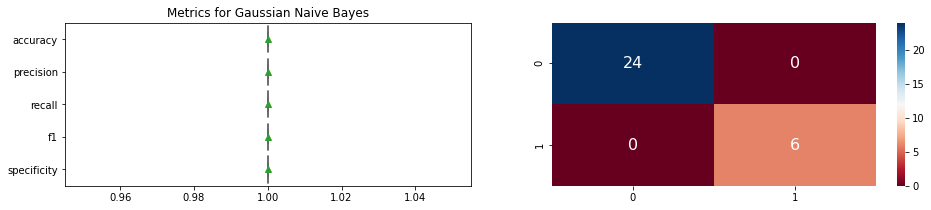

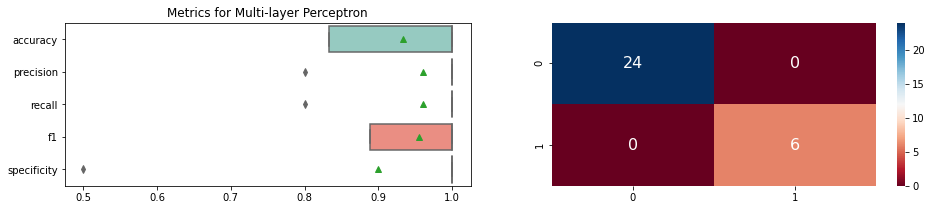

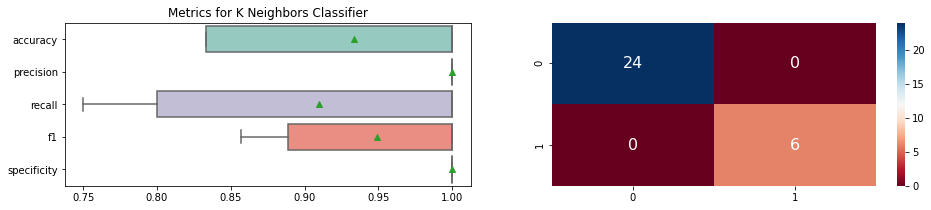

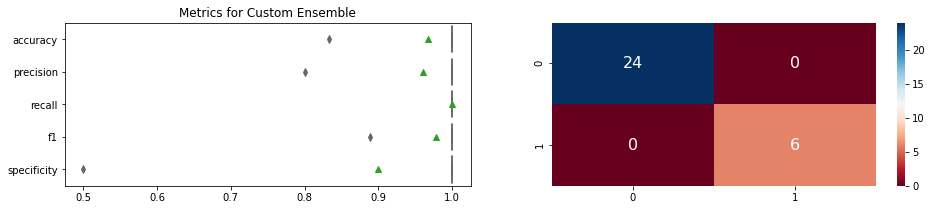

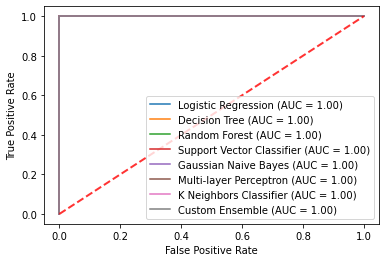

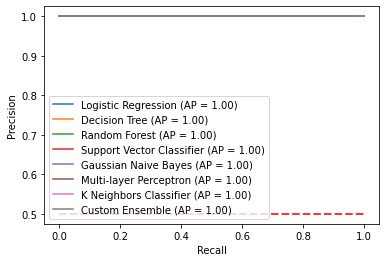

In [8]:
# evaluate models before oversampling
evaluate.generate_metrics(trained_models, x_test, y_test, ['accuracy', 'precision', 'recall', 'f1', 'specificity'], 
                          cv_num=ut.sd['cv_num'], show_raw_data=False)